In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import spacy

Funtions

In [2]:
def remove_url_punctuation(X):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    replace_url = url_pattern.sub(r'', str(X))
    punct_pattern = re.compile(r'[^\w\s]')
    no_punct = punct_pattern.sub(r'', replace_url).lower()
    return no_punct

def split_words(X):
    split_word_list = X.split(" ")
    return split_word_list

def remove_stopwords(X):
    global stop_words
    words = []
    for word in X:
        if word not in stop_words and len(word) > 2 and word != 'nan':
            words.append(word)
    return words

def detect_language(X):
    from langdetect import detect
    try:
        lang = detect(X)
        return(lang)
    except:
        return ("other")

Load Tweet

In [3]:
print("D1")
columns = ["id", "text"]
df1 = pd.read_csv("D1.csv", names = columns, sep = ",")
print(df1.head())

print("\n\nD2")
df2 = pd.read_csv("D2.csv", names = columns, sep = ",")
print(df2.head())

D1
                    id                                               text
0  1267316247500374016   @yokastarodrig: George Floyd fucking Kimberly...
1  1267316247508602886                        @MoneyBaggYo: Fuck 12 4L 🖕🏾
2  1267316247500165121  So Gujarat HC now praises govt and says if sta...
3  1267316247500333056  Cristiano Ronaldo was the fastest player in th...
4  1267316247533772800   @shehadeh_salem: Called them the N word. He f...


D2
                    id                                               text
0  1265593411115143169  Waste meat found stored in the cold room, expi...
1  1265593411781959680  Are you changing your marketing to ensure you'...
2  1265593411530158080  The Boy, a haircut and the #lockdown2020 and M...
3  1265593433407750144  #coronavirus #covid-19 #BillGatesA spiritual m...
4  1265593557248704513  This video shows the emergency ward of a Mumba...


Remove Punctuation, Special Char, ...

In [4]:
print("D1")
df1['tidy_tweet'] = df1['text'].apply(remove_url_punctuation)
print(df1['text'].head())
print("*****")
print(df1['tidy_tweet'].head())

print("\n\nD2")
df2['tidy_tweet'] = df2['text'].apply(remove_url_punctuation)
print(df2['text'].head())
print("*****")
print(df2['tidy_tweet'].head())

D1
0     @yokastarodrig: George Floyd fucking Kimberly...
1                          @MoneyBaggYo: Fuck 12 4L 🖕🏾
2    So Gujarat HC now praises govt and says if sta...
3    Cristiano Ronaldo was the fastest player in th...
4     @shehadeh_salem: Called them the N word. He f...
Name: text, dtype: object
*****
0     yokastarodrig george floyd fucking kimberly b...
1                              moneybaggyo fuck 12 4l 
2    so gujarat hc now praises govt and says if sta...
3    cristiano ronaldo was the fastest player in th...
4     shehadeh_salem called them the n word he full...
Name: tidy_tweet, dtype: object


D2
0    Waste meat found stored in the cold room, expi...
1    Are you changing your marketing to ensure you'...
2    The Boy, a haircut and the #lockdown2020 and M...
3    #coronavirus #covid-19 #BillGatesA spiritual m...
4    This video shows the emergency ward of a Mumba...
Name: text, dtype: object
*****
0    waste meat found stored in the cold room expir...
1    are you cha

Tweet In English

In [5]:
print("D1")
df1['en'] = df1['text'].apply(detect_language)
print(df1['tidy_tweet'].head())
print("*****")
df1 = df1[df1['en'] == 'en']
print(df1['tidy_tweet'].head())

print("\n\nD2")
df2['en'] = df2['text'].apply(detect_language)
print(df2['tidy_tweet'].head())
print("*****")
df2 = df2[df2['en'] == 'en']
print(df2['tidy_tweet'].head())

D1
0     yokastarodrig george floyd fucking kimberly b...
1                              moneybaggyo fuck 12 4l 
2    so gujarat hc now praises govt and says if sta...
3    cristiano ronaldo was the fastest player in th...
4     shehadeh_salem called them the n word he full...
Name: tidy_tweet, dtype: object
*****
0     yokastarodrig george floyd fucking kimberly b...
2    so gujarat hc now praises govt and says if sta...
3    cristiano ronaldo was the fastest player in th...
4     shehadeh_salem called them the n word he full...
5    breaking atlanta mayor keisha lance bottoms an...
Name: tidy_tweet, dtype: object


D2
0    waste meat found stored in the cold room expir...
1    are you changing your marketing to ensure your...
2    the boy a haircut and the lockdown2020 and mis...
3    coronavirus covid19 billgatesa spiritual musli...
4    this video shows the emergency ward of a mumba...
Name: tidy_tweet, dtype: object
*****
0    waste meat found stored in the cold room expir...
1   

Tokenize Tweets

In [6]:
print("D1")
df1['word_list'] = df1['tidy_tweet'].apply(split_words)
print(df1['word_list'].head())

print("\n\nD2")
df2['word_list'] = df2['tidy_tweet'].apply(split_words)
print(df2['word_list'].head())

D1
0    [, yokastarodrig, george, floyd, fucking, kimb...
2    [so, gujarat, hc, now, praises, govt, and, say...
3    [cristiano, ronaldo, was, the, fastest, player...
4    [, shehadeh_salem, called, them, the, n, word,...
5    [breaking, atlanta, mayor, keisha, lance, bott...
Name: word_list, dtype: object


D2
0    [waste, meat, found, stored, in, the, cold, ro...
1    [are, you, changing, your, marketing, to, ensu...
2    [the, boy, a, haircut, and, the, lockdown2020,...
3    [coronavirus, covid19, billgatesa, spiritual, ...
4    [this, video, shows, the, emergency, ward, of,...
Name: word_list, dtype: object


Remove Stop Words

In [7]:
global stop_words
stop_words = set(stopwords.words('english'))
print("D1")
df1['nlp_tweet'] = df1['word_list'].apply(remove_stopwords)
print(df1['word_list'].head(5))
print("*****")
print(df1['nlp_tweet'].head(5))

print("\n\nD2")
df2['nlp_tweet'] = df2['word_list'].apply(remove_stopwords)
print(df2['word_list'].head(5))
print("*****")
print(df2['nlp_tweet'].head(5))

D1
0    [, yokastarodrig, george, floyd, fucking, kimb...
2    [so, gujarat, hc, now, praises, govt, and, say...
3    [cristiano, ronaldo, was, the, fastest, player...
4    [, shehadeh_salem, called, them, the, n, word,...
5    [breaking, atlanta, mayor, keisha, lance, bott...
Name: word_list, dtype: object
*****
0    [yokastarodrig, george, floyd, fucking, kimber...
2    [gujarat, praises, govt, says, state, govt, wa...
3    [cristiano, ronaldo, fastest, player, history,...
4    [shehadeh_salem, called, word, fully, deserved...
5    [breaking, atlanta, mayor, keisha, lance, bott...
Name: nlp_tweet, dtype: object


D2
0    [waste, meat, found, stored, in, the, cold, ro...
1    [are, you, changing, your, marketing, to, ensu...
2    [the, boy, a, haircut, and, the, lockdown2020,...
3    [coronavirus, covid19, billgatesa, spiritual, ...
4    [this, video, shows, the, emergency, ward, of,...
Name: word_list, dtype: object
*****
0    [waste, meat, found, stored, cold, room, expir...
1    [c

Example Finding a Word From a List

In [12]:
print("D1")
all_words_unique_list1 = (df1['nlp_tweet'].explode()).unique()
print("Number of unique words:", len(all_words_unique_list1))

word_list1 = list(df1['nlp_tweet'].explode())
word_count_dict1 = collections.Counter(word_list1)

normalized_count1 = {}
for k, v in word_count_dict1.items():
    normalized_count1[k] = v/len(df1['nlp_tweet'])
    
nltk_count1 = nltk.FreqDist(word_list1)

print(word_count_dict1.most_common(100))
print(normalized_count1['covid19'])
print("*****")
print(nltk_count1.most_common(100))


print("\n\nD2")
all_words_unique_list2 = (df2['nlp_tweet'].explode()).unique()
print("Number of unique words:", len(all_words_unique_list2))

word_list2 = list(df2['nlp_tweet'].explode())
word_count_dict2 = collections.Counter(word_list2)

normalized_count2 = {}
for k, v in word_count_dict2.items():
    normalized_count2[k] = v/len(df2['nlp_tweet'])
    
nltk_count2 = nltk.FreqDist(word_list2)

print(word_count_dict2.most_common(100))
print(normalized_count2['covid19'])
print("*****")
print(nltk_count2.most_common(100))

D1
Number of unique words: 4612
[('people', 93), ('dont', 70), ('black', 58), ('amp', 54), ('police', 51), ('like', 49), ('white', 47), ('get', 38), ('youre', 35), ('cant', 35), ('shit', 35), ('protest', 34), ('fucking', 33), ('one', 33), ('need', 33), ('fuck', 32), ('please', 31), ('even', 31), ('yall', 30), ('know', 30), ('cops', 28), ('trump', 28), ('want', 26), ('love', 26), ('man', 25), ('right', 23), ('going', 22), ('protests', 22), ('way', 22), ('looting', 21), ('today', 21), ('see', 21), ('still', 21), ('say', 21), ('think', 20), ('really', 20), ('thats', 20), ('time', 20), ('twitter', 20), ('violence', 20), ('said', 20), ('antifa', 19), ('isnt', 19), ('would', 18), ('every', 18), ('take', 18), ('world', 18), ('much', 18), ('got', 18), ('lives', 18), ('live', 18), ('back', 18), ('president', 18), ('media', 17), ('racism', 17), ('happy', 17), ('something', 17), ('everyone', 17), ('believe', 16), ('never', 16), ('seen', 16), ('also', 16), ('make', 16), ('anonymous', 16), ('new', 

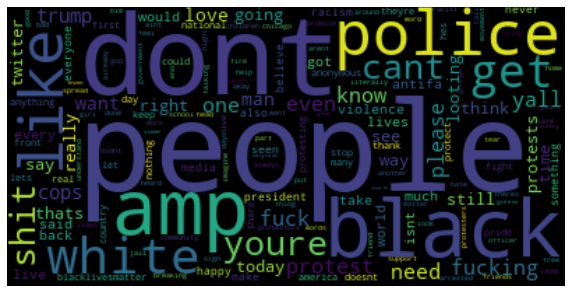

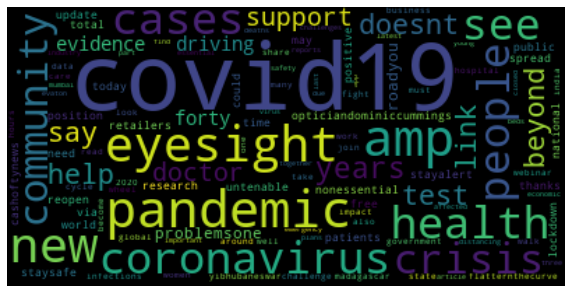

In [9]:
wordcloud1 = WordCloud().generate_from_frequencies(nltk_count1)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud1, interpolation = "bilinear")
plt.axis("off")
plt.show()

wordcloud2 = WordCloud().generate_from_frequencies(nltk_count2)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud2, interpolation = "bilinear")
plt.axis("off")
plt.show()
# comparison.cloud(term.matrix,max.words=40,random.order=FALSE)